In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np

In [2]:
fr_df = pd.read_csv('https://www.data.gouv.fr/fr/datasets/r/63352e38-d353-4b54-bfd1-f1b3ee1cabd7', sep=";", header=0)
fr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16365 entries, 0 to 16364
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   dep     16362 non-null  object
 1   sexe    16365 non-null  int64 
 2   jour    16365 non-null  object
 3   hosp    16365 non-null  int64 
 4   rea     16365 non-null  int64 
 5   rad     16365 non-null  int64 
 6   dc      16365 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 895.1+ KB


In [3]:
delete2A2B = fr_df[(fr_df['dep'] == "2A")|(fr_df['dep'] == "2B")].index
fr_df.drop(delete2A2B , inplace=True)
fr_df['dep'] = fr_df['dep'].fillna(0).astype(np.int64)
fr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16041 entries, 0 to 16364
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   dep     16041 non-null  int64 
 1   sexe    16041 non-null  int64 
 2   jour    16041 non-null  object
 3   hosp    16041 non-null  int64 
 4   rea     16041 non-null  int64 
 5   rad     16041 non-null  int64 
 6   dc      16041 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 1002.6+ KB


In [4]:
idf_df = fr_df[(fr_df['dep']==75) | (fr_df['dep']==77) | (fr_df['dep']==78) | (fr_df['dep']==91) | (fr_df['dep']==92) | (fr_df['dep']==93) | (fr_df['dep']==94) | (fr_df['dep']==95)]
idf_df = idf_df.reset_index(drop=True)
idf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   dep     1296 non-null   int64 
 1   sexe    1296 non-null   int64 
 2   jour    1296 non-null   object
 3   hosp    1296 non-null   int64 
 4   rea     1296 non-null   int64 
 5   rad     1296 non-null   int64 
 6   dc      1296 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 71.0+ KB


In [5]:
idf_df.head()

dep  sexe        jour  hosp  rea  rad  dc
0   75     0  2020-03-18   359  105   40  14
1   75     1  2020-03-18   217   70   22  10
2   75     2  2020-03-18   139   35   18   4
3   77     0  2020-03-18    25   13   10   0
4   77     1  2020-03-18    15   12    6   0

In [6]:
cumulative=idf_df[(idf_df['sexe']!=0)].index
idf_df.drop(cumulative, inplace=True)
idf_df = idf_df.reset_index(drop=True)
idf_df['dep'] = idf_df['dep'].astype('category')
print(idf_df)

    dep  sexe        jour  hosp  rea   rad    dc
0    75     0  2020-03-18   359  105    40    14
1    77     0  2020-03-18    25   13    10     0
2    78     0  2020-03-18    69   18     5     5
3    91     0  2020-03-18    51   16     0     1
4    92     0  2020-03-18   149   48    22     4
..   ..   ...         ...   ...  ...   ...   ...
427  91     0  2020-05-10   965  110  1533   450
428  92     0  2020-05-10  1553  190  3181   939
429  93     0  2020-05-10  1341  139  2583   887
430  94     0  2020-05-10  1598  184  2873  1002
431  95     0  2020-05-10   815   58  1876   617

[432 rows x 7 columns]


In [7]:
rea=idf_df['rea']
hosp=idf_df['hosp']
idf_df = idf_df.assign(reaperhosp=pd.Series(np.divide(rea,hosp)*100))
print(idf_df)

    dep  sexe        jour  hosp  rea   rad    dc  reaperhosp
0    75     0  2020-03-18   359  105    40    14   29.247911
1    77     0  2020-03-18    25   13    10     0   52.000000
2    78     0  2020-03-18    69   18     5     5   26.086957
3    91     0  2020-03-18    51   16     0     1   31.372549
4    92     0  2020-03-18   149   48    22     4   32.214765
..   ..   ...         ...   ...  ...   ...   ...         ...
427  91     0  2020-05-10   965  110  1533   450   11.398964
428  92     0  2020-05-10  1553  190  3181   939   12.234385
429  93     0  2020-05-10  1341  139  2583   887   10.365399
430  94     0  2020-05-10  1598  184  2873  1002   11.514393
431  95     0  2020-05-10   815   58  1876   617    7.116564

[432 rows x 8 columns]


In [8]:
dep_94=idf_df[(idf_df['dep'])==94]
data_94=dep_94['reaperhosp']
dep_93=idf_df[(idf_df['dep'])==93]
data_93=dep_93['reaperhosp']

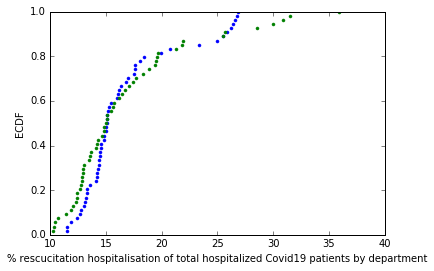

In [9]:
a=np.sort(dep_94['reaperhosp'])
b=np.arange(1, len(a)+1)/len(a)
_=plt.plot(a, b, marker='.', linestyle='none', label='94')
c=np.sort(dep_93['reaperhosp'])
d=np.arange(1, len(c)+1)/len(c)
_=plt.plot(c, d, marker='.', linestyle='none', label='93')
_=plt.xlabel('% rescucitation hospitalisation of total hospitalized Covid19 patients by department')
_=plt.ylabel('ECDF')

In [10]:
def delta_mean_1D(data1, data2):
    dep_both=np.concatenate((data1, data2))
    dep_perm=np.random.permutation(dep_both)
    perm_sample_data1=dep_perm[:len(data1)]
    perm_sample_data2=dep_perm[len(data1):]
    dmean = np.mean(perm_sample_data1) - np.mean(perm_sample_data2)
    return dmean

def draw_perm_means(data1, data2, size):
    delta_mean=np.empty(size)
    for i in range(size):
        delta_mean[i] = delta_mean_1D(data1,data2)
    return delta_mean

data1=data_94
data2=data_93

dif_mean_perms = draw_perm_means(data1, data2, 1000)

print(dif_mean_perms)

[ 2.00261953e+00  6.75703079e-01  5.09000083e-01  2.03775746e+00
  3.33165460e-01 -2.44515061e-01  3.58719653e-01  2.17454225e+00
 -4.18796152e-01 -6.11489417e-01 -4.60144679e-02 -4.88643651e-01
 -5.36839847e-01 -1.45085698e+00  7.94792605e-03  6.47103094e-02
 -1.60937222e-02 -5.65135561e-01  3.90023817e-01  1.07347706e+00
 -1.03613883e+00  9.58008567e-02  2.45309958e-01 -1.17805603e+00
 -1.03722784e-01  1.28967917e+00 -1.51944255e+00  2.18704875e+00
  5.45550042e-01 -2.34884315e-01 -1.26058642e+00  2.06398562e-01
  7.47581171e-01 -2.91544026e-01 -2.65781476e-01 -1.67171811e+00
  2.35726809e+00  2.68576444e+00  1.26134996e-01  7.32520634e-01
 -1.91576807e+00 -7.29461498e-01 -1.25718676e+00  1.28340745e+00
 -4.36771070e-02  2.15748801e+00  5.50536197e-01  1.07059768e+00
 -1.09764614e+00  7.73166445e-01  3.78607157e-01  2.79677894e-01
 -9.71087738e-01  6.88258993e-01  4.04581367e-01 -4.55599491e-01
  1.48633866e+00 -1.29190646e+00 -1.13581765e-01 -8.68866812e-01
 -1.31831032e-01 -6.67150

In [11]:
diff_mean_obs=np.mean(data1)-np.mean(data2)
print(diff_mean_obs)

-0.11066183548558328


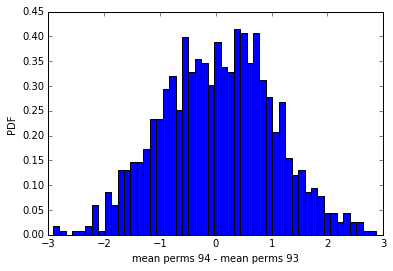

In [12]:
_ = plt.hist(dif_mean_perms, bins=50, density=True)
_ = plt.xlabel('mean perms 94 - mean perms 93')
_ = plt.ylabel('PDF')

In [13]:
p_value = np.sum(dif_mean_perms <= diff_mean_obs) / 1000
print(p_value)

0.446
